# TMDB Movie Data Project

## Project Description
### This dataset includes user reviews and box office figures for 10,000 films that were gathered from The Movie Database (TMDb), the url(https://www.kaggle.com/tmdb/tmdb-movie-metadata).
### This projects aims at analysing the dataset to answer the following questions;

##  Questions to answer:
### 1. DIsplay amount of Vote_count per language
### 2. Relationship between Revenue and Runtime
### 3. Relationship between Revenue and Popularity
### 4. Relationship between Revenue and Amount of Votes
### 5. Which language has the highest popularity
### 6. Top five voted for movies.
### 7. Movie with longest runtime

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.chdir('/')

In [3]:
#Reading and previewing csv document
df = pd.read_csv("/home/opejoseph/Documents/ALX Assignments/tmdb_5000_movies.csv")
df.sample(5)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3133,10000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 27, ""nam...",NaN,17577,"[{""id"": 187820, ""name"": ""duct tape gag""}, {""id...",en,The Devil's Tomb,Captain Mack leads an elite military unit on a...,5.099472,"[{""name"": ""Ice Cold Productions"", ""id"": 3336},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-26,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An evil entombed for 2000 years... until now.,The Devil's Tomb,4.0,53
642,65000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10752, ""n...",http://www.unbrokenfilm.com/,227306,"[{""id"": 1956, ""name"": ""world war ii""}, {""id"": ...",en,Unbroken,"A chronicle of the life of Louis Zamperini, an...",43.055253,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-12-25,163442937,137.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Survival. Resilience. Redemption.,Unbroken,7.3,1400
4789,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39851,"[{""id"": 6782, ""name"": ""addiction""}, {""id"": 155...",en,Clean,"After losing her husband to a heroin overdose,...",1.464566,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2004-09-01,0,111.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,"When you don't have a choice, you change.",Clean,6.7,17
3110,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.welcometotherileys-movie.com/,31007,"[{""id"": 549, ""name"": ""prostitute""}, {""id"": 570...",en,Welcome to the Rileys,"Years after their teenage daughter’s death, Lo...",6.085879,"[{""name"": ""Destination Films"", ""id"": 769}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-10-29,42145,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Welcome to the Rileys,6.4,139
2455,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,639,"[{""id"": 242, ""name"": ""new york""}, {""id"": 1157,...",en,When Harry Met Sally...,"During their travels from Chicago to New York,...",18.430419,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1989-07-21,92823546,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Can two friends sleep together and still love ...,When Harry Met Sally...,7.3,950


In [4]:
#Checking the statistical distribution across the fields
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Replacing the "0" values in budget column with the mean. Assuming the correct budget was not entered. Same would be done for other columns of interest;  popularity, revenue, runtime,vote_average and vote_count.

In [5]:
#creating a new data frame "df_cleaner" to hold deal with the "0" values in budget, popularity, revenue, runtime,vote_average and vote_count by replacing them by the mean.
df_cleaner = df[~(df[["budget", "id", "popularity", "revenue", "runtime"]] < 0.000000).all(axis=1)]

In [6]:
#replacing the 0 values in budget column with the mean.
df_cleaner['budget'].replace(to_replace = 0, value = df_cleaner['budget'].mean(), inplace=True)
df_cleaner['popularity'].replace(to_replace = 0, value = df_cleaner['popularity'].mean(), inplace=True)
df_cleaner['revenue'].replace(to_replace = 0, value = df_cleaner['revenue'].mean(), inplace=True)
df_cleaner['revenue'].replace(to_replace = 0, value = df_cleaner['revenue'].mean(), inplace=True)
df_cleaner['runtime'].replace(to_replace = 0, value = df_cleaner['runtime'].mean(), inplace=True)
df_cleaner['vote_average'].replace(to_replace = 0, value = df_cleaner['vote_average'].mean(), inplace=True)
df_cleaner['vote_count'].replace(to_replace = 0, value = df_cleaner['vote_count'].mean(), inplace=True)

In [7]:
df_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   float64
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   float64
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:

#checking for missing value column
df_cleaner.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [33]:
#dropping homepage and timeline since it is not needed and has missing values, release date and runtime is left because their number is not more than 2
df_final = df_cleaner.drop(['homepage', 'tagline','overview'], axis=1)

In [10]:
#confirming the dropped columns
df_final.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [11]:
#the min attribute of the describe method shows that the 0 values have been replace
df_final.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,3.531606e+07,57165.484281,21.496775,1.067008e+08,107.655000,6.172081,699.127736
std,3.790514e+07,88694.614033,31.815138,1.546419e+08,20.673744,0.966326,1232.060053
min,1.000000e+00,5.000000,0.000372,5.000000e+00,14.000000,0.500000,1.000000
25%,1.200000e+07,9014.500000,4.674558,2.760697e+07,94.000000,5.600000,59.000000
50%,2.904504e+07,14629.000000,12.928269,8.226064e+07,104.000000,6.200000,250.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## From the describe and info method we can see that:
  ## Now after cleaning, the dataset contains 4803 records. The highest value of budgetted for any movie is 308 million, while the lowest value is approximately 1 million. The mean amount budgetted is about thirty-five million.
  
  ## The highest value of popularity  for any movie is about four hundred and fifty-nine thousand, four hundred and eighty-eight while the minimum is 0.000372, while the lowest value is approximately 1 million. The mean amount budgetted is about thirty-five million.
  
  ## The highest value of revenue  for any movie is about 5 dollars,which does not look correct enough but i am limited by the dataset given. The maximum revenue is  two billion seven hundred eighty-seven million nine hundred sixty-five thousand , The mean amount revenue is about one hundred six million seven hundred thousand eight hundred
  
  ## The longest runtime  for any movie is three-hundred and thirty eight minutes, t while the minimum is fourteen minutes. The mean amount of runtime is about a hundred and seven minutes with some seconds.

# 0. Insights from the Top 10 Budgetted Movies

In [34]:
df_final.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,3.531606e+07,57165.484281,21.496775,1.067008e+08,107.655000,6.172081,699.127736
std,3.790514e+07,88694.614033,31.815138,1.546419e+08,20.673744,0.966326,1232.060053
min,1.000000e+00,5.000000,0.000372,5.000000e+00,14.000000,0.500000,1.000000
25%,1.200000e+07,9014.500000,4.674558,2.760697e+07,94.000000,5.600000,59.000000
50%,2.904504e+07,14629.000000,12.928269,8.226064e+07,104.000000,6.200000,250.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [30]:
# defining bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#87CEEB", edgecolor="k", width=width)


    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

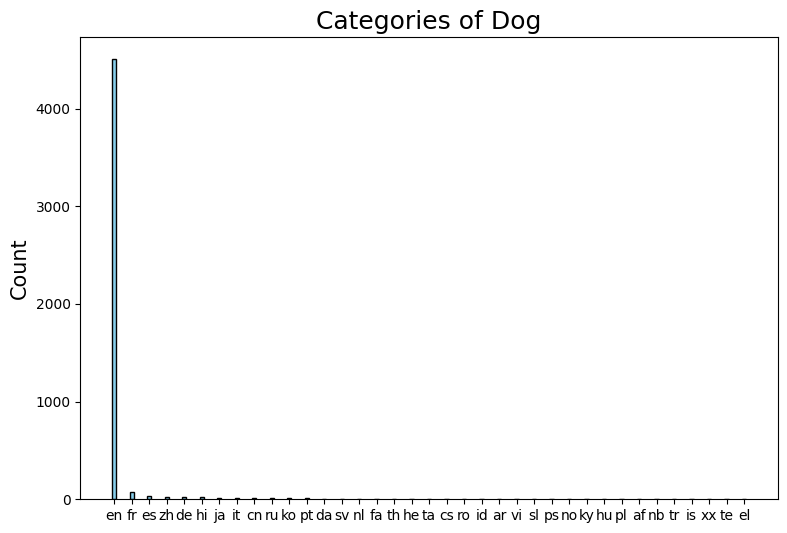

In [32]:
# plot language categories
language_types = pd.DataFrame(df_final.original_language.value_counts())

plot_bar(language_types.index,
         language_types.original_language,
         width=0.25, 
         title="Language Category", 
         ylabel="Count")

### kde plot shows the probability density for budgets distribution, there is a prominence between 0.0 and 0.5

<AxesSubplot:xlabel='budget', ylabel='Density'>

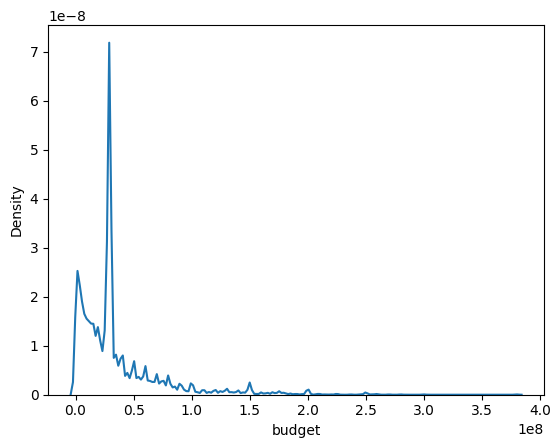

In [35]:
#KDE Plot
sns.kdeplot(data=df_final, x="budget", bw_adjust=.2)

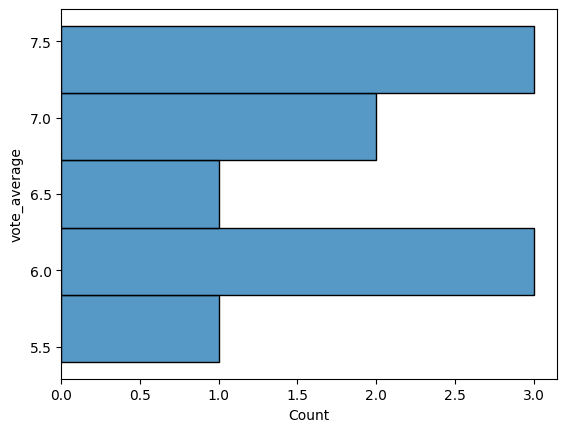

In [15]:
#Univariate Data: Checking the distribution of vote averages from the top 10 budgetted movies
top_5_budget = df_final.sort_values('budget', ascending=False).head(10)
ax = sns.histplot(y="vote_average", data = top_5_budget)

### From the box plot before there is more votecounted in the less than 2000 compared to the higher x axis end. There are few outliers in the 4000 range

<AxesSubplot:xlabel='vote_count'>

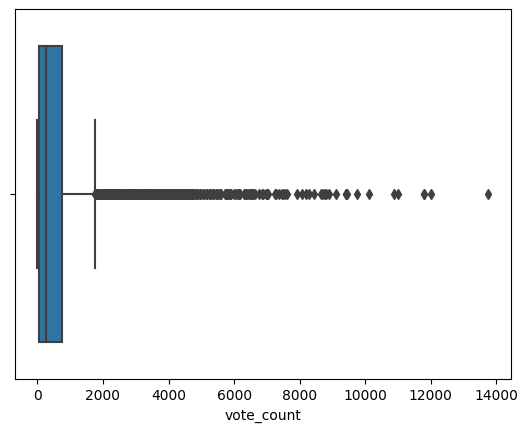

In [16]:
#boxplot, univariate. 
sns.boxplot(x=df_final['vote_count'])

In [17]:
#Type casting the release date_column to be a datetime column
df_cleaner['release_date'] = pd.to_datetime(df_cleaner['release_date'])

# 1. Amount of Vote per Language

In [36]:
#Variable(new_lang) was created to hold the value of each unique call value of "original_language". The result was printed out with the head function.
new_lang = df_final["original_language"].value_counts()
new_lang.head()

en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

# 2. Relationship between Revenue and Runtime.  
### From the plot below,there is an no distinct correlation in this chart. But it is visible that movies in the range of runtime 200 and 100 have increase in revenue.

<AxesSubplot:title={'center':'Runtime against Revenue'}, xlabel='revenue', ylabel='runtime'>

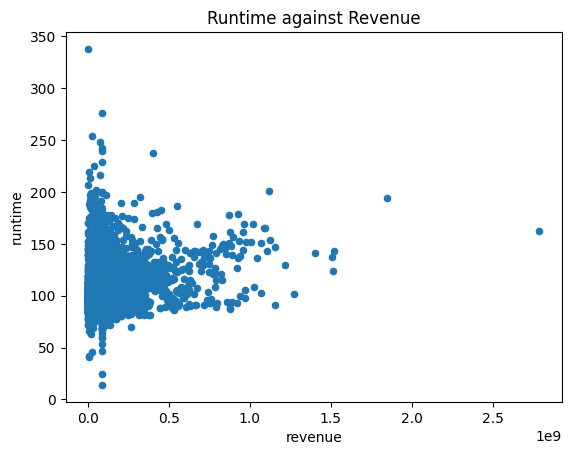

In [37]:
#Scatter plot was done to check the relationship between "revenue" and "runtime" using the plot method of matplotlib.
df_final.plot(x="revenue", y="runtime", kind="scatter", title="Runtime against Revenue")

# 3. Relationship between Revenue and Popularity
### From the plot below,there is an almost perfect positive correlation. There is a gradual increase in revenue with popularity. There are outliers which suppport this statement also.

<AxesSubplot:title={'center':'Revenue against Popularity'}, xlabel='revenue', ylabel='popularity'>

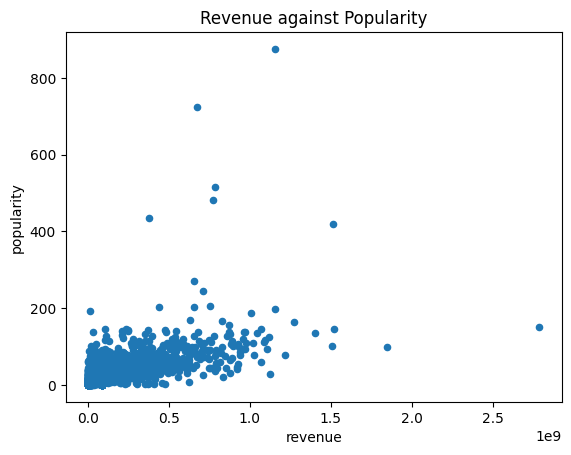

In [38]:
#Scatter plot was done to check the relationship between "revenue" and "popularity" using the plot method of matplotlib.
df_final.plot(x="revenue", y="popularity", kind="scatter", title="Revenue against Popularity")


# 4. Relationship between Revenue and Average Vote
### From the plot below, there is an almost perfect positive correclation. It is clear that there is revenue increase with increase in vote. Also some of the outliers but still supports this claim

<AxesSubplot:title={'center':'Amount of Vote against Revenue'}, xlabel='revenue', ylabel='vote_count'>

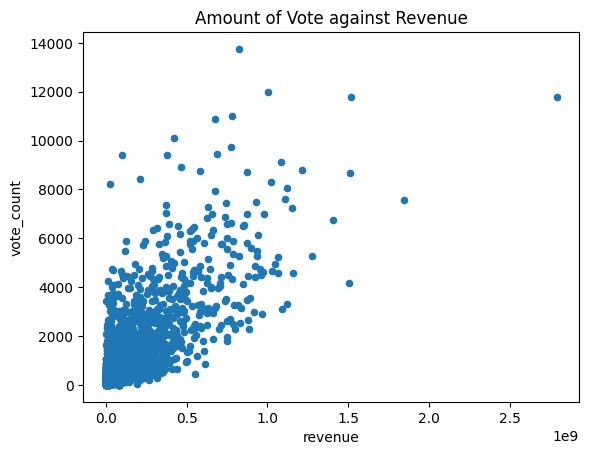

In [39]:
#Scatter plot was done to check the relationship between "revenue" and "vote_count" using the plot method of matplotlib.
df_final.plot(x="revenue", y="vote_count", kind="scatter", title="Amount of Vote against Revenue")

# 5. Language With the Highest Popularity is ENGLISH
###	Minions	875.581305	en

In [40]:
#Variable (df_top5_popular) was created to hold the sorted value of top 5 popular movies, it was sorted in acending order in-order to get top 5
df_top5_popular = df_final.sort_values(by=['popularity','title'], ascending=False)
df_top5_popular[['title','popularity','original_language']].head(5)

,title,popularity,original_language
546,Minions,875.581305,en
95,Interstellar,724.247784,en
788,Deadpool,514.569956,en
94,Guardians of the Galaxy,481.098624,en
127,Mad Max: Fury Road,434.278564,en


# 6. Top 5 Voted for Movies
### Title	Vote Count
###	Inception	13752
###	The Dark Knight	12002
###	Avatar	11800
###	The Avengers	11776
###	Deadpool	10995

In [23]:
df_top5_vote = df_final.sort_values(by=['vote_count','title'], ascending=False)
new_df = df_top5_vote[['title','vote_count']].head(5)
new_df

,title,vote_count
96,Inception,13752.0
65,The Dark Knight,12002.0
0,Avatar,11800.0
16,The Avengers,11776.0
788,Deadpool,10995.0


[Text(0.5, 1.0, 'Top 5 Voted Movie')]

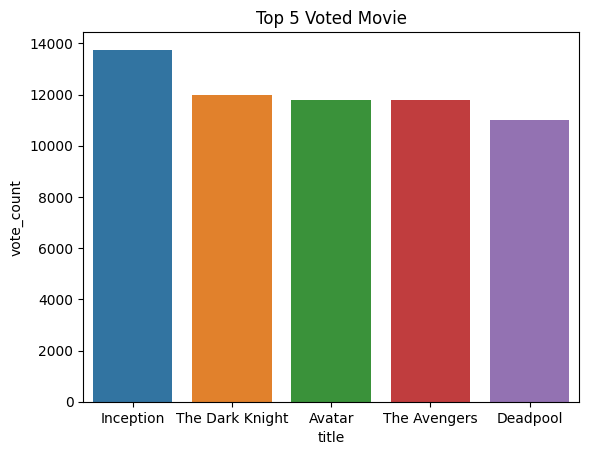

In [24]:
sns.barplot(data=new_df, x="title", y="vote_count").set(title='Top 5 Voted Movie')

# 7. Movie with longest runtime is "Carlos" with 338 Minutes!
### Check cell 48

In [25]:
#Movie with longest runtime is 338 minutes!
df_final['runtime'].max()

338.0

[Text(0.5, 1.0, 'Top 5 Titles with Highest Budget')]

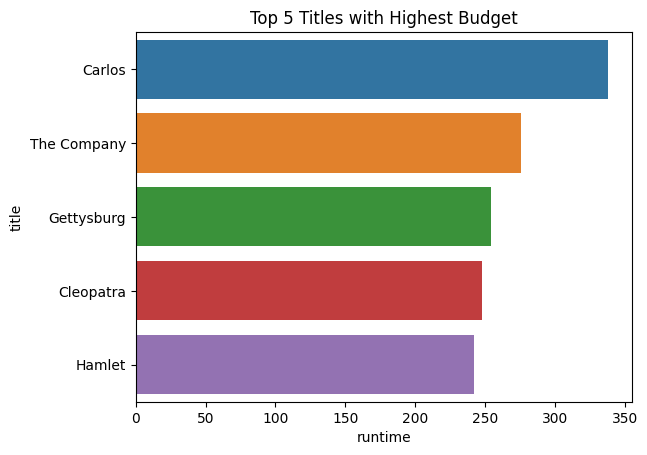

In [28]:
df_rt = df_final.sort_values(by=['runtime',], ascending=False).head(5)
sns.barplot(data=df_rt, y="title", x="runtime").set(title='Top 5 Titles with Highest Budget')

# CONCLUSIONS
## All questions have been answered.
### 1. Amount of votes per Language?
	en    4505
	fr      70
	es      32
	zh      27
	de      27
### 2. Relationship between Revenue and Runtime?
	There is no distinct correlation in this chart. But it is visible that movies in the range of runtime 200 and 100 have increase in revenue.
### 3. Relationship between Revenue and Popularity?
	There is an almost perfect positive correlation. There is a gradual increase in revenue with popularity. There are outliers which suppport this statement also.
### 4. Relationship between Revenue and Amount of Votes?
	There is an almost perfect positive correclation. It is clear that there is revenue increase with increase in vote. Also some of the outliers but still supports this claim
### 5. Which language has the highest popularity?
	Language With the Highest Popularity is ENGLISH, Minion is the most popular movie.

### 6. Top five voted for movies?
	Inception	13752
	The Dark Knight	12002
    Avatar	11800
	The Avengers	11776
	Deadpool	10995

### 7. Movie with longest runtime? 
	Carlos

## Limitations
### I could not get presentable inside from  production_countries and spoken_language columns becuase their values needs trimming

### Report
	Analysis was done, and aim achieved.

In [27]:
df_cleaner.to_csv('/home/opejoseph/Documents/ALX Assignments/Investigate.csv')